In [1]:
import datasets

In [2]:
# Read in the dataset
X, Y = datasets.read_highweh_grid()

In [13]:
# The last time bin is the end of the last bin
time_bins = datasets.time_bins_dan[:-1]

# Avoid error with x-axis log scale
time_bins[0] = 1e-20

See how the die-away curve changes with different WEH and absorbers 

<IPython.core.display.Javascript object>


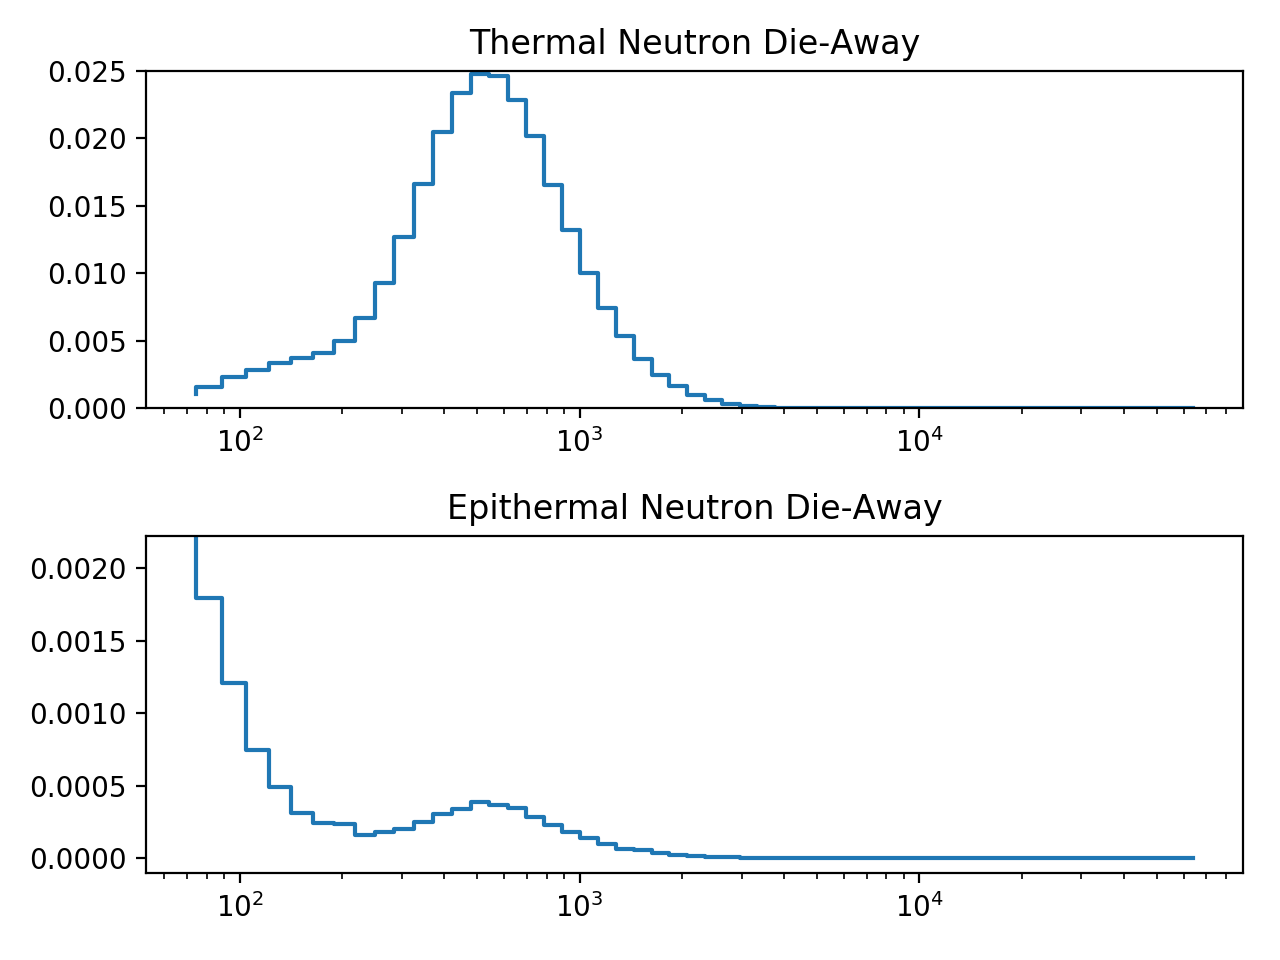

A Jupyter Widget

In [64]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

weh = sorted(list(set(Y[:,0])))
bnacs = sorted(list(set(Y[:,1])))
fig, (ax1, ax2) = plt.subplots(2)
thermal, = ax1.step(time_bins[9:], X[np.where((Y[:,0] == weh[0]) & (Y[:,1] == bnacs[0]))][0,9:64])
epithermal, = ax2.step(time_bins[9:], X[np.where((Y[:,0] == weh[0]) & (Y[:,1] == bnacs[0]))][0,64+9:])

ax1.set_title("Thermal Neutron Die-Away")
ax2.set_title("Epithermal Neutron Die-Away")
ax1.set_xscale('log')
ax1.set_ylim(0,0.025)
ax2.set_xscale('log')
fig.tight_layout()


_w = SelectionSlider(options=weh, description='WEH')
_b = SelectionSlider(options=bnacs, description='$\Sigma_{abs}$', readout_format='.4f')
@interact
def update(w=_w, b=_b):
    thermal.set_ydata(X[np.where((Y[:,0] == w) & (Y[:,1] == b))][0,9:64])
    epithermal.set_ydata(X[np.where((Y[:,0] == w) & (Y[:,1] == b))][0,64+9:])
    fig.canvas.draw_idle()

#interact(update);